In [113]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
all_seasons_home_stats_df = pd.read_csv('all_season_home.csv')
all_seasons_away_stats_df = pd.read_csv('all_season_away.csv')

In [96]:
home_goals = all_seasons_home_stats_df['home_team_goal_count']
away_goals = all_seasons_away_stats_df['away_team_goal_count']

columns_to_drop_home = ['date_GMT','timestamp','home_team_goal_count','total_goal_count','total_goals_at_half_time','home_team_goal_count_half_time','away_team_goal_count_half_time','home_team_goal_timings'
                   ,'away_team_goal_timings','home_team_corner_count','away_team_corner_count','home_team_yellow_cards','home_team_red_cards','away_team_yellow_cards','away_team_red_cards',
                   'home_team_first_half_cards','home_team_second_half_cards','away_team_first_half_cards','away_team_second_half_cards','home_team_shots','away_team_shots','home_team_shots_on_target',
                   'away_team_shots_on_target','home_team_shots_off_target','away_team_shots_off_target','home_team_fouls','away_team_fouls','home_team_possession','away_team_possession',
                   'status','attendance']

columns_to_drop_away = ['date_GMT','timestamp','away_team_goal_count','total_goal_count','total_goals_at_half_time','home_team_goal_count_half_time','away_team_goal_count_half_time','home_team_goal_timings'
                   ,'away_team_goal_timings','home_team_corner_count','away_team_corner_count','home_team_yellow_cards','home_team_red_cards','away_team_yellow_cards','away_team_red_cards',
                   'home_team_first_half_cards','home_team_second_half_cards','away_team_first_half_cards','away_team_second_half_cards','home_team_shots','away_team_shots','home_team_shots_on_target',
                   'away_team_shots_on_target','home_team_shots_off_target','away_team_shots_off_target','home_team_fouls','away_team_fouls','home_team_possession','away_team_possession',
                   'status','attendance']

# Drop these columns from the predictor variables DataFrame
y_home = all_seasons_home_stats_df['home_team_goal_count']
y_away = all_seasons_away_stats_df['away_team_goal_count']
X_home = all_seasons_home_stats_df.drop(columns_to_drop_home, axis=1)
X_away = all_seasons_away_stats_df.drop(columns_to_drop_away, axis=1)

In [98]:
print(X_home.shape)
print(y_home.shape)

(8048, 678)
(8048,)


In [205]:
class SoccerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SoccerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.LeakyReLU(negative_slope=0.1)
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(hidden_size, 150) 
        self.bn2 = nn.BatchNorm1d(150)
        
        self.fc3 = nn.Linear(150, 50)
        self.bn3 = nn.BatchNorm1d(50)
        
        self.fc4 = nn.Linear(50, 20)
        self.bn4 = nn.BatchNorm1d(20)
        
        self.fc5 = nn.Linear(20, 5)
        self.bn5 = nn.BatchNorm1d(5)
        
        self.fc6 = nn.Linear(5, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc3(out)
        out = self.bn3(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc4(out)
        out = self.bn4(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc5(out)
        out = self.bn5(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc6(out)
        return out


In [128]:
scaler = StandardScaler()
X_home_np = X_home.values
y_home_np = y_home.values
scaler.fit(X_home_np)
inputs = torch.tensor(X_home_np, dtype=torch.float)
labels = torch.tensor(y_home_np, dtype=torch.float)
labels = torch.tensor(y_home_np, dtype=torch.float).unsqueeze(1)

In [97]:
X_home

,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,away_team_goal_count,Home Team Pre-Match xG,...,rolling_avg_goals_conceded_min_61_to_70,rolling_avg_goals_conceded_min_71_to_80,rolling_avg_goals_conceded_min_81_to_90,rolling_avg_draw_percentage_overall,rolling_avg_draw_percentage_home,rolling_avg_draw_percentage_away,rolling_avg_loss_percentage_ovearll,rolling_avg_loss_percentage_home,rolling_avg_loss_percentage_away,rolling_avg_over145_corners_percentage
0,1.0,7.0,96.0,4.0,3.00,3.00,1.95,0.58,1.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
1,1.0,52.0,69.0,6.0,3.00,0.00,1.95,0.89,3.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
2,1.0,4.0,65.0,8.0,2.00,0.67,1.95,0.68,1.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
3,1.0,53.0,73.0,10.0,2.25,0.50,1.95,0.68,0.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
4,1.0,34.0,72.0,11.0,2.40,1.40,1.95,1.05,1.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8043,55.0,17.0,5.0,28.0,1.42,0.92,1.26,1.00,2.0,1.46,...,5.0,3.0,8.0,24.0,21.0,26.0,45.0,42.0,47.0,13.0
8044,55.0,25.0,51.0,30.0,1.43,0.71,1.26,1.05,3.0,1.51,...,5.0,3.0,8.0,24.0,21.0,26.0,45.0,42.0,47.0,13.0
8045,55.0,2.0,23.0,31.0,1.33,1.20,1.26,1.16,1.0,1.54,...,5.0,3.0,8.0,24.0,21.0,26.0,45.0,42.0,47.0,13.0
8046,55.0,29.0,65.0,33.0,1.35,2.47,1.26,2.42,5.0,1.51,...,5.0,3.0,8.0,24.0,21.0,26.0,45.0,42.0,47.0,13.0


In [129]:
print(inputs.shape)
print(labels.shape)

torch.Size([8048, 678])
torch.Size([8048, 1])


In [216]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
home_net = SoccerNet(inputs.shape[1],300,1)
home_net.to(device)
criterion = nn.MSELoss() 
optimizer = optim.SGD(home_net.parameters(), lr=0.05)

# Move the input and label tensors to the GPU
inputs = inputs.to(device)
labels = labels.to(device)

Epoch 10, Loss: 0.9409741163253784
Epoch 20, Loss: 1.7186297178268433
Epoch 30, Loss: 0.6789858937263489
Epoch 40, Loss: 1.1548384428024292
Epoch 50, Loss: 2.079371452331543
Epoch 60, Loss: 1.5807373523712158
Epoch 70, Loss: 1.7742737531661987
Epoch 80, Loss: 1.537805438041687
Epoch 90, Loss: 0.8559925556182861
Epoch 100, Loss: 1.3404297828674316
Epoch 110, Loss: 1.9417064189910889
Epoch 120, Loss: 3.330991268157959
Epoch 130, Loss: 2.2876789569854736
Epoch 140, Loss: 0.971826434135437
Epoch 150, Loss: 0.9197849631309509
Epoch 160, Loss: 0.6192053556442261
Epoch 170, Loss: 0.8849726915359497
Epoch 180, Loss: 1.0041191577911377
Epoch 190, Loss: 1.8382282257080078
Epoch 200, Loss: 1.6106500625610352
Epoch 210, Loss: 3.1630923748016357
Epoch 220, Loss: 3.09379506111145
Epoch 230, Loss: 0.6082760095596313
Epoch 240, Loss: 1.6350228786468506
Epoch 250, Loss: 1.698195457458496
Epoch 260, Loss: 1.625342845916748
Epoch 270, Loss: 1.4688465595245361
Epoch 280, Loss: 0.9513128995895386
Epoch 290

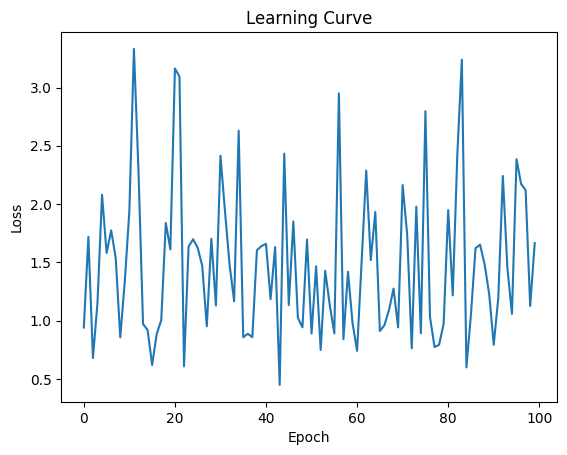

In [218]:
# Lists to store the loss values and epochs
loss_values = []
epochs = []

prev_loss = None
unchanged_count = 0
batch_size = 32

# Training the model with mini-batch training
for epoch in range(1000):
    # Shuffle the data before each epoch
    indices = torch.randperm(inputs.size(0))
    inputs_shuffled = inputs[indices]
    labels_shuffled = labels[indices]
    
    for i in range(0, inputs.size(0), batch_size):
        # Select a mini-batch
        inputs_batch = inputs_shuffled[i:i+batch_size]
        labels_batch = labels_shuffled[i:i+batch_size]
        
        # Forward pass
        outputs = home_net(inputs_batch)
        loss = criterion(outputs, labels_batch)
        
        # Check if loss remains the same
        if prev_loss is not None and loss.item() == prev_loss:
            unchanged_count += 1
        else:
            unchanged_count = 0
        
        # Break the loop if loss remained unchanged for 1000 epochs
        if unchanged_count == 1000:
            print(f'Loss remained unchanged for 1000 epochs. Stopping training.')
            break
        
        # Update previous loss
        prev_loss = loss.item()
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        loss_values.append(loss.item())
        epochs.append(epoch + 1)
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')



# Plot the learning curve
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

# Save the model if needed
torch.save(home_net.state_dict(), 'soccer_net.ckpt')